In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA, KernelPCA
import oscillators

# 1. PCA

## 1.1 PCA is eigendecomposition of covariance matrix

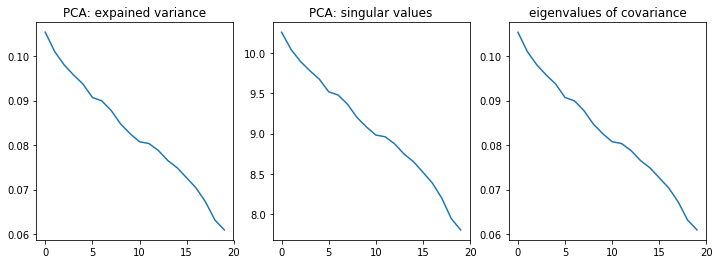

In [2]:
nDim = 20
nData = 1000

def naive_pca(d):
    return np.sort(np.linalg.eig(np.cov(d))[0])[::-1]
    
data = np.random.uniform(0,1,(nDim, nData))

pca = PCA(n_components=nDim)
pca.fit(data.T)

fig, ax = plt.subplots(ncols=3, figsize=(12,4))
ax[0].plot(pca.explained_variance_)
ax[1].plot(pca.singular_values_)
ax[2].plot(naive_pca(data))
ax[0].set_title("PCA: expained variance")
ax[1].set_title("PCA: singular values")
ax[2].set_title("eigenvalues of covariance")
plt.show()

## 1.2 Covariance vs Correlation

**NOTE 1:** All standard libraries calculate eigenvalues of covariance

**NOTE 2:** The major difference is that covariance takes account of differences in variance of individual channels, whereas correlation normalizes over them

* If the goal is to **cluster dimensions** that better **explain variance** together, one should use **covariance**, because individual variance is also a variance that needs to be explained
* If the goal is to **detect linear relationships** between channels, one should use **correlation**, because individual variances do not contribute to relationships, thus the metric should be insensitive to them

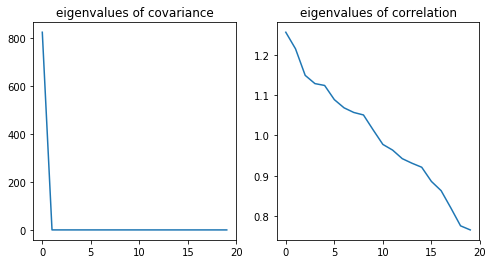

In [3]:
nDim = 20
nData = 1000

def pca_cov(d):
    return np.sort(np.linalg.svd(np.cov(d))[1])[::-1]

def pca_corr(d):
    return np.sort(np.linalg.svd(np.corrcoef(d))[1])[::-1]
    
data = np.random.uniform(0,1,(nDim, nData))
data[0] *= 100

fig, ax = plt.subplots(ncols=2, figsize=(8,4))
ax[0].plot(pca_cov(data))
ax[1].plot(pca_corr(data))
ax[0].set_title("eigenvalues of covariance")
ax[1].set_title("eigenvalues of correlation")
plt.show()

## 1.3 Correlated vs Uncorrelated data

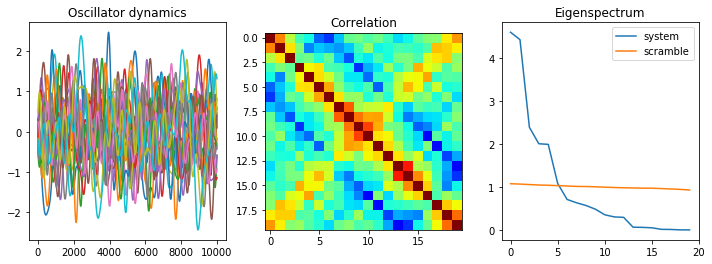

In [4]:
nChannel = 20
nTimestep = 10000
xx = oscillators.generate_oscillators_line(nChannel, nTimestep)

fig, ax = plt.subplots(ncols=3, figsize=(12,4))
ax[0].plot(xx.T)
ax[0].set_title('Oscillator dynamics')

xx_scramble = np.array([x[np.random.permutation(nTimestep)] for x in xx])

ax[1].imshow(np.corrcoef(xx), vmin=-1, vmax=1, cmap='jet')
ax[1].set_title('Correlation')

ax[2].plot(pca_corr(xx), label='system')
ax[2].plot(pca_corr(xx_scramble), label='scramble')
ax[2].legend()
ax[2].set_title('Eigenspectrum')


plt.show()

# Other PCA versions

* Sparse PCA tries to predict sparse components
* KPCA tries to combine pca with nonlinear mapping

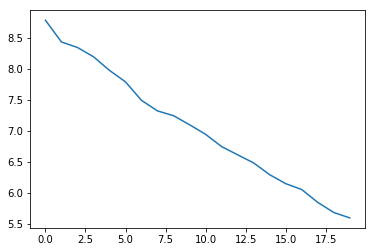

In [183]:
kpca = KernelPCA(kernel="rbf")
kpca.fit(data.T)

plt.figure()
plt.plot(kpca.lambdas_[:20])
plt.show()